In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [3]:
df=pd.read_csv('CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8706,C18943,53.918649,1.000000,293.40,0.00,293.40,0.000000,1.000000,0.0,0.916667,0.000000,0,12,1000.0,214.720832,170.993091,0.090909,12
542,C10566,1284.633140,1.000000,55.50,0.00,55.50,5406.459348,0.083333,0.0,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.000000,12
2586,C12661,193.126540,1.000000,1955.98,0.00,1955.98,0.000000,1.000000,0.0,1.000000,0.000000,0,53,2500.0,1891.721179,203.382558,0.666667,12
3433,C13530,14.944700,0.636364,381.50,0.00,381.50,0.000000,0.583333,0.0,0.583333,0.000000,0,7,3000.0,602.003541,124.074597,0.666667,12
1653,C11707,2388.030134,1.000000,3832.98,2004.03,1828.95,1441.065248,1.000000,1.0,1.000000,0.083333,1,90,11000.0,5990.392370,600.897569,0.083333,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.CREDIT_LIMIT=df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())

In [9]:
df.MINIMUM_PAYMENTS=df.MINIMUM_PAYMENTS.fillna(0)

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
x=df[["BALANCE","BALANCE_FREQUENCY","PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]]

In [12]:
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,95.40,0.000000,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,0.00,0.000000,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,0.00,205.788017,7500.0,0.000000,0.000000,0.000000
4,817.714335,1.000000,16.00,0.00,0.000000,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,300.00,0.000000,1000.0,275.861322,0.000000,0.000000
8947,23.398673,0.833333,144.40,144.40,0.000000,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,36.558778,500.0,52.549959,55.755628,0.250000


In [13]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.5123757125616898
Number of cluster 3,silhouette0.46780710907483575
Number of cluster 4,silhouette0.461278247743383
Number of cluster 5,silhouette0.3859240783672197
Number of cluster 6,silhouette0.3783402615414391
Number of cluster 7,silhouette0.376935831000519
Number of cluster 8,silhouette0.3913338163676102
Number of cluster 9,silhouette0.35970205644014597


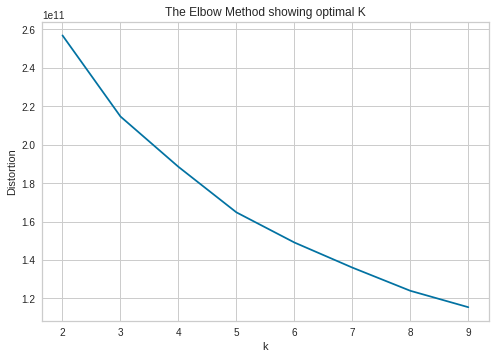

In [14]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?

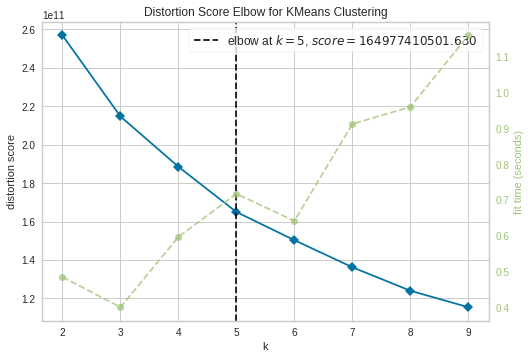

In [15]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [16]:
model=KMeans(n_clusters=5)

In [17]:
model=model.fit(x)

In [18]:
tahmin=model.predict(x) #sadece x var

In [19]:
tahmin

array([1, 3, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
x['cluster']=tahmin

In [21]:
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,95.40,0.000000,1000.0,201.802084,139.509787,0.000000,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,0.222222,3
2,2495.148862,1.000000,773.17,0.00,0.000000,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,0.00,205.788017,7500.0,0.000000,0.000000,0.000000,0
4,817.714335,1.000000,16.00,0.00,0.000000,1200.0,678.334763,244.791237,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1000.0,325.594462,48.886365,0.500000,1
8946,19.183215,1.000000,300.00,300.00,0.000000,1000.0,275.861322,0.000000,0.000000,1
8947,23.398673,0.833333,144.40,144.40,0.000000,1000.0,81.270775,82.418369,0.250000,1
8948,13.457564,0.833333,0.00,0.00,36.558778,500.0,52.549959,55.755628,0.250000,1


In [22]:
silhouette_score(x,tahmin)

0.3862595729897843

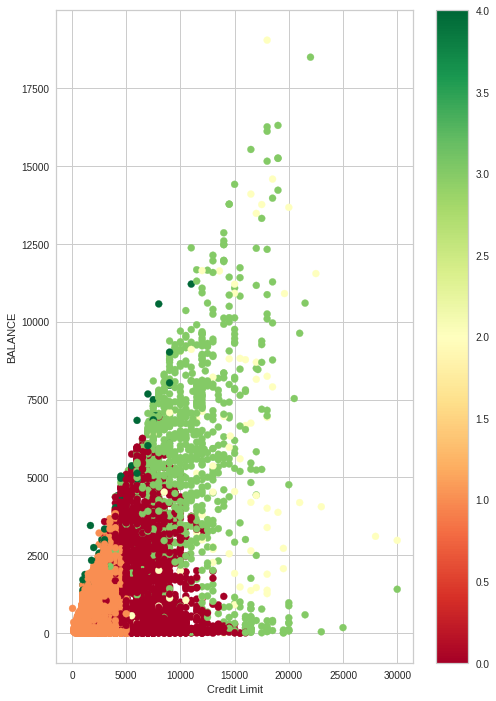

In [24]:
plt.figure(figsize=(8,12))
plt.scatter(x.CREDIT_LIMIT,x.BALANCE,c=tahmin,cmap='RdYlGn')
plt.xlabel('Credit Limit')
plt.ylabel('BALANCE')
plt.legend()
plt.colorbar()
plt.show()

In [25]:
import seaborn as sns

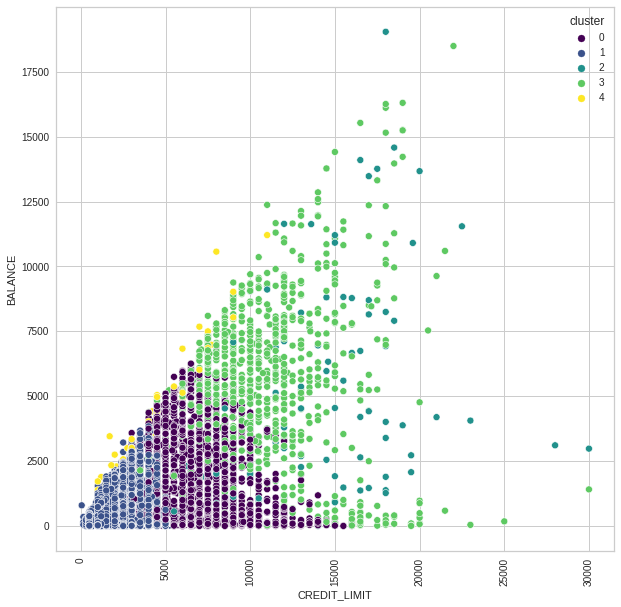

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x.CREDIT_LIMIT,x.BALANCE, hue= x.cluster,palette= "viridis")
plt.xticks(rotation=90);

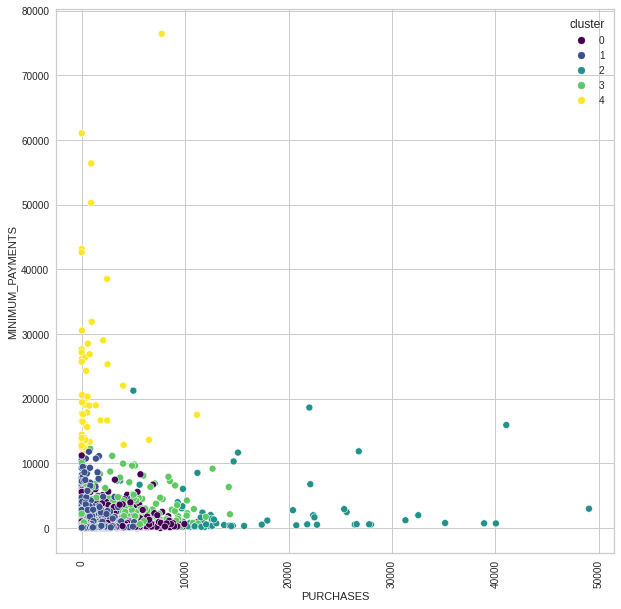

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x.PURCHASES,x.MINIMUM_PAYMENTS, hue= x.cluster,palette= "viridis")
plt.xticks(rotation=90);

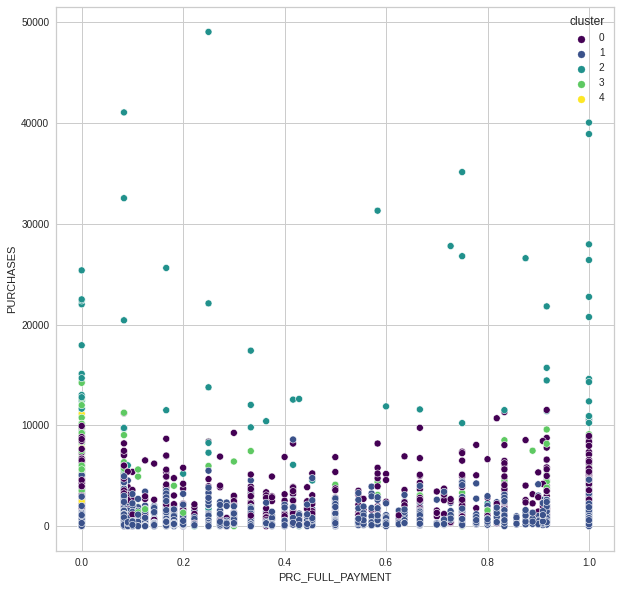

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x.PRC_FULL_PAYMENT,x.PURCHASES, hue= x.cluster,palette= "viridis");

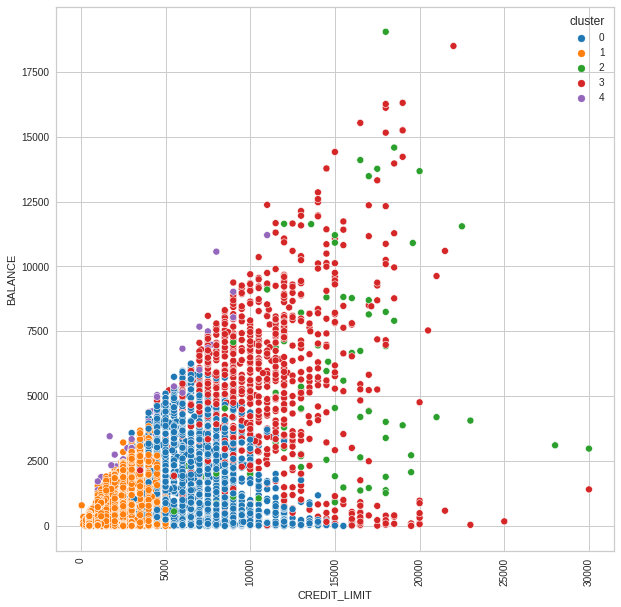

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x.CREDIT_LIMIT,x.BALANCE, hue= x.cluster,palette= "tab10")
plt.xticks(rotation=90);

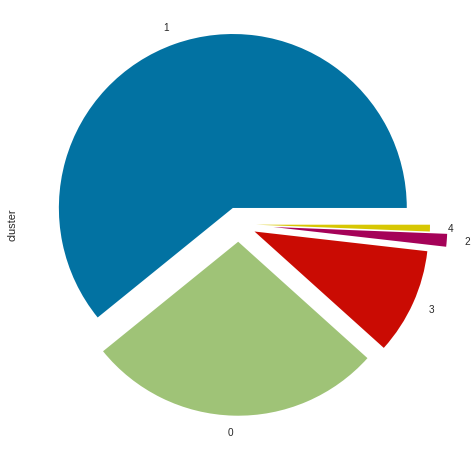

In [34]:
plt.figure(figsize=(8,8)) 
#df['month_name'].value_counts().plot.pie()
explode=[0.1,0.1,0.1,0.2,0.1]
#pastaları ayırmak için explode yazılıp ayırmak istenilen 0.2 gibi yazılır ve ayırırx
x.cluster.value_counts().plot.pie(explode=explode)

In [35]:
x["cluster"].value_counts()

1    5445
0    2461
3     882
2     106
4      56
Name: cluster, dtype: int64

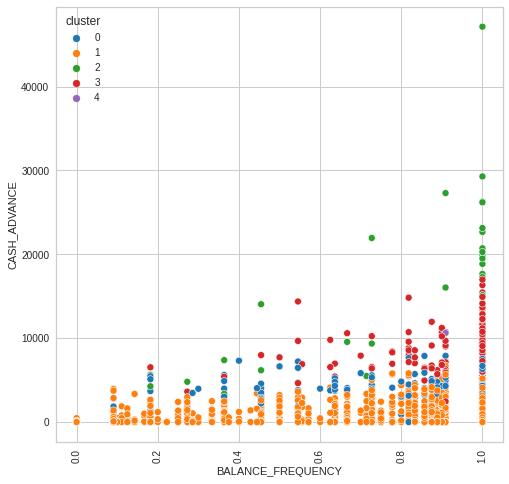

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(x.BALANCE_FREQUENCY,x.CASH_ADVANCE, hue= x.cluster,palette= "tab10")
plt.xticks(rotation=90);